In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('creditcard.csv')

## First look at data

In [2]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## EDA

## Scaling

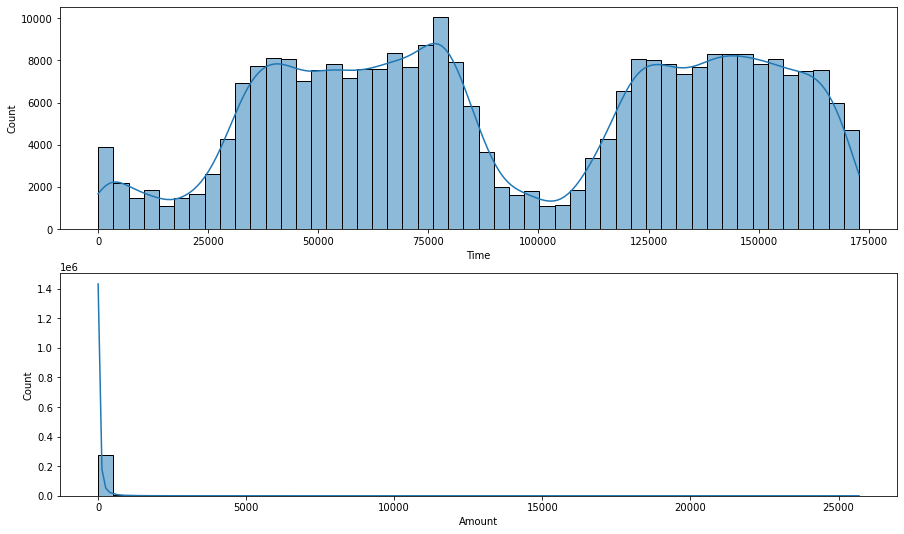

In [3]:
plt.figure(figsize = (15, 9))

plt.subplot(211)
sns.histplot(df['Time'], kde=True, bins = 50)

plt.subplot(212)
sns.histplot(df['Amount'], kde=True, bins = 50)

plt.show()

In [4]:
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()

df['Amount_scaled'] = robustScaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time_scaled'] = robustScaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

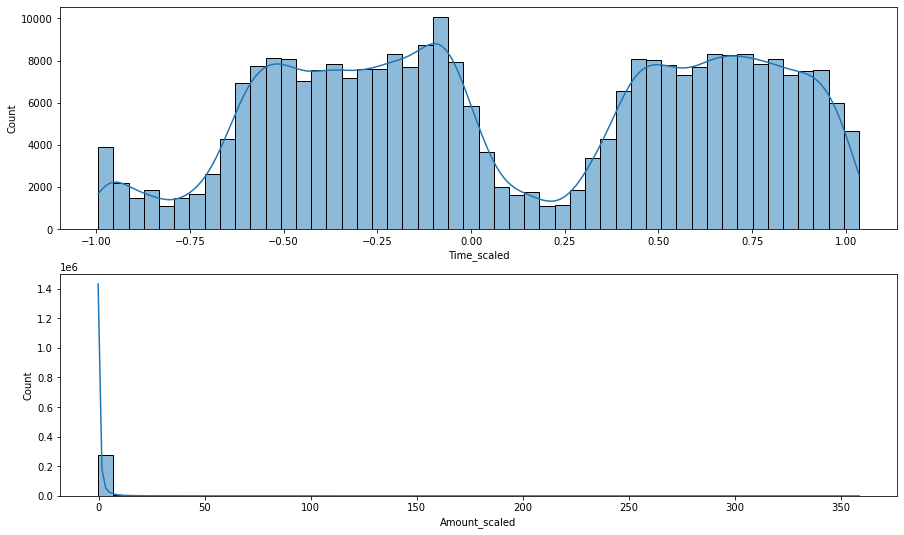

In [5]:
plt.figure(figsize = (15, 9))

plt.subplot(211)
sns.histplot(df['Time_scaled'], kde=True, bins = 50)

plt.subplot(212)
sns.histplot(df['Amount_scaled'], kde=True, bins = 50)

plt.show()

## Splitting the data

In [6]:
print('Non fraud: ', df['Class'].value_counts()[0] / len(df['Class']))

Non fraud:  0.9982725143693799


In [7]:
X = df.drop('Class', axis=1)
y = df['Class']

from sklearn.model_selection import StratifiedKFold
stratifiedKFold = StratifiedKFold(n_splits=5)

for train_index, test_index in stratifiedKFold.split(X, y):
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]

print('Train non fraud: ', np.unique(ytrain, return_counts=True)[1][0] / len(ytrain))
print('Test non fraud: ', np.unique(ytest, return_counts=True)[1][0] / len(ytest))

Train non fraud:  0.9982707618303591
Test non fraud:  0.9982795245869981


In [8]:
train = pd.concat([Xtrain, ytrain], axis=1)
train = train.sample(frac=1, random_state=42)

train_fraud = train.loc[train['Class'] == 1]
train_non_fraud = train.loc[train['Class'] == 0][:np.sum(train['Class'] == 1)]

train_undersampled = pd.concat([train_fraud, train_non_fraud]).sample(frac=1, random_state=43)

print('Undersampled train non fraud: ', train_undersampled['Class'].value_counts()[0] / len(train_undersampled))

Undersampled train non fraud:  0.5


## Anomaly Detection

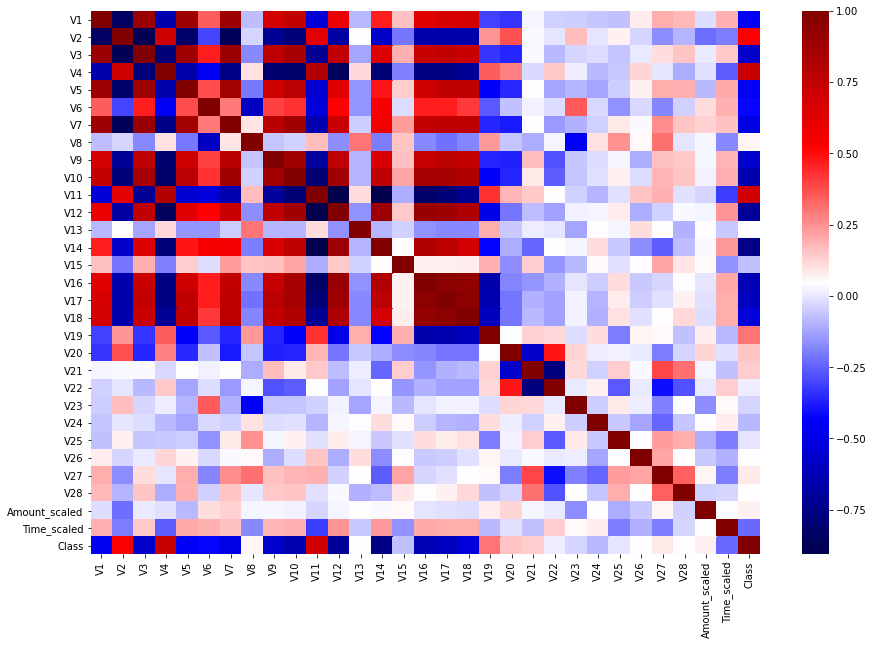

In [9]:
plt.figure(figsize = (15, 10))
sns.heatmap(train_undersampled.corr(), cmap='seismic')
plt.show()

In [10]:
corr_asc = train_undersampled.corr()['Class'][:-1].sort_values(ascending=True)[:4]
corr_dsc = train_undersampled.corr()['Class'][:-1].sort_values(ascending=False)[:4]

print('Correlation in ascending order')
print(corr_asc)
print('Correlation in descending order')
print(corr_dsc)

Correlation in ascending order
V14   -0.749617
V12   -0.699288
V10   -0.644124
V16   -0.630319
Name: Class, dtype: float64
Correlation in descending order
V4     0.718051
V11    0.701060
V2     0.532457
V19    0.300560
Name: Class, dtype: float64


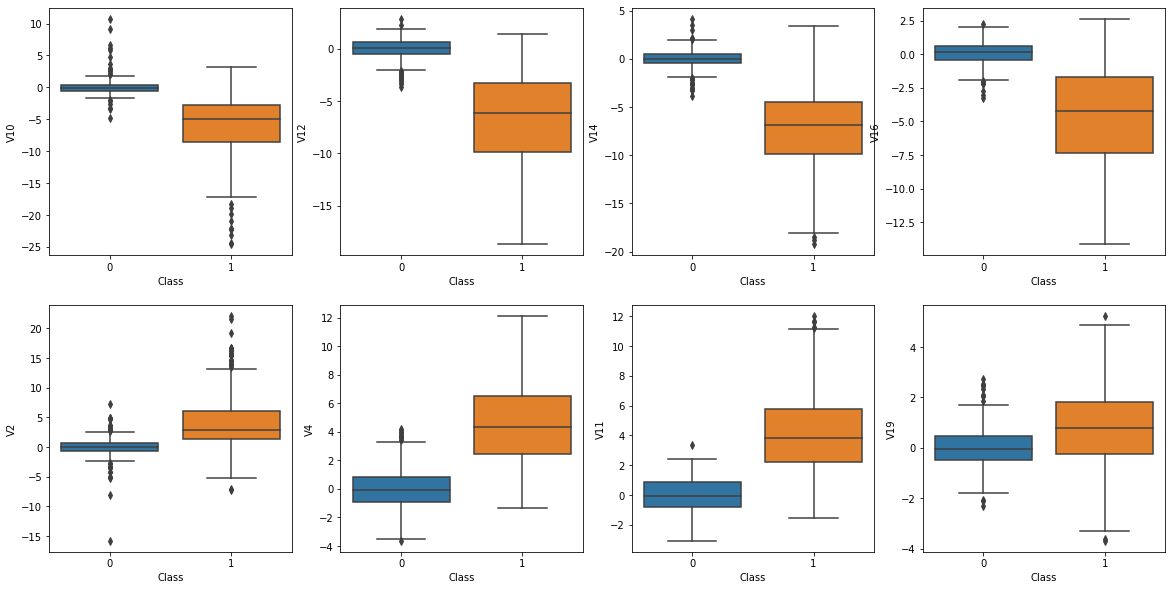

In [11]:
plt.figure(figsize = (20, 10))

plt.subplot(241)
sns.boxplot(x="Class", y="V10", data=train_undersampled)

plt.subplot(242)
sns.boxplot(x="Class", y="V12", data=train_undersampled)

plt.subplot(243)
sns.boxplot(x="Class", y="V14", data=train_undersampled)

plt.subplot(244)
sns.boxplot(x="Class", y="V16", data=train_undersampled)

plt.subplot(245)
sns.boxplot(x="Class", y="V2", data=train_undersampled)

plt.subplot(246)
sns.boxplot(x="Class", y="V4", data=train_undersampled)

plt.subplot(247)
sns.boxplot(x="Class", y="V11", data=train_undersampled)

plt.subplot(248)
sns.boxplot(x="Class", y="V19", data=train_undersampled)

plt.show()

In [12]:
for V in corr_asc.index.union(corr_dsc.index):
    V_fraud = train_undersampled[V][train_undersampled['Class'] == 1]

    q25 = np.percentile(V_fraud, 25)
    q75 = np.percentile(V_fraud, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    train_undersampled = train_undersampled.drop(train_undersampled[(train_undersampled[V] > upper) | (train_undersampled[V] < lower)].index)

Xtrain_undersampled = train_undersampled.drop('Class', axis=1)
ytrain_undersampled = train_undersampled['Class']
    

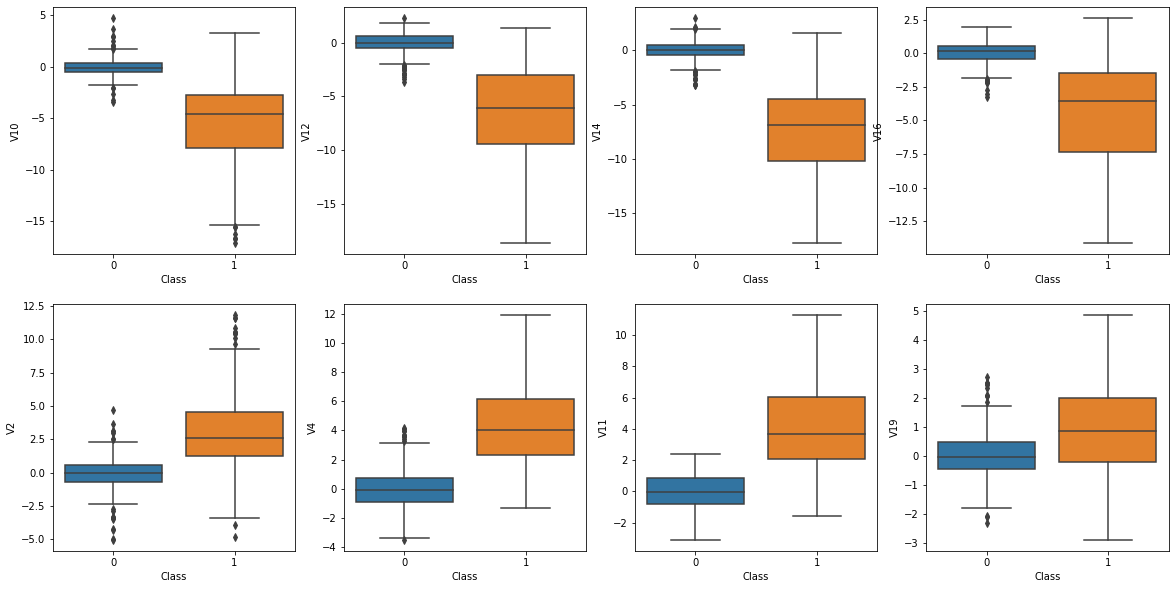

In [13]:
plt.figure(figsize = (20, 10))

plt.subplot(241)
sns.boxplot(x="Class", y="V10", data=train_undersampled)

plt.subplot(242)
sns.boxplot(x="Class", y="V12", data=train_undersampled)

plt.subplot(243)
sns.boxplot(x="Class", y="V14", data=train_undersampled)

plt.subplot(244)
sns.boxplot(x="Class", y="V16", data=train_undersampled)

plt.subplot(245)
sns.boxplot(x="Class", y="V2", data=train_undersampled)

plt.subplot(246)
sns.boxplot(x="Class", y="V4", data=train_undersampled)

plt.subplot(247)
sns.boxplot(x="Class", y="V11", data=train_undersampled)

plt.subplot(248)
sns.boxplot(x="Class", y="V19", data=train_undersampled)

plt.show()

## Dimensionality Reduction, Clustering

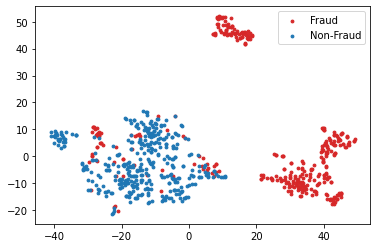

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42).fit_transform(Xtrain_undersampled.values)

plt.scatter(tsne[:,0][ytrain_undersampled == 1], tsne[:,1][ytrain_undersampled == 1], c='tab:red', s=8, label='Fraud')
plt.scatter(tsne[:,0][ytrain_undersampled == 0], tsne[:,1][ytrain_undersampled == 0], c='tab:blue', s=8, label='Non-Fraud')
plt.legend()
plt.show()

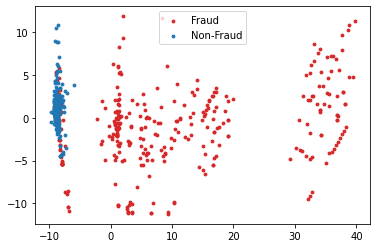

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42).fit_transform(Xtrain_undersampled.values)

plt.scatter(pca[:,0][ytrain_undersampled == 1], pca[:,1][ytrain_undersampled == 1], c='tab:red', s=8, label='Fraud')
plt.scatter(pca[:,0][ytrain_undersampled == 0], pca[:,1][ytrain_undersampled == 0], c='tab:blue', s=8, label='Non-Fraud')
plt.legend()
plt.show()

## Modeling

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

for key, classifier in classifiers.items():
    classifier.fit(Xtrain_undersampled, ytrain_undersampled)
    training_score = cross_val_score(classifier, Xtrain_undersampled, ytrain_undersampled, cv=5)
    print(classifier.__class__.__name__, " : ", training_score.mean())

LogisticRegression  :  0.9451393481341521
KNeighborsClassifier  :  0.9259045819555975
SVC  :  0.9341237600377893
DecisionTreeClassifier  :  0.8970902220122815
